# Road Accident Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing RTA dataset
df = pd.read_csv("./RTA Dataset.csv")

Lets look into RTA dataset.

In [3]:
df.head(6)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury


In [4]:
print(f"Shape of the data: {df.shape}")
print(f"Columns : {df.columns}")

Shape of the data: (12316, 32)
Columns : Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


We are removing the columns which are irrelevant to our use case.

In [5]:
column_list_to_drop = ['Educational_level', 'Owner_of_vehicle', 'Vehicle_driver_relation', 'Service_year_of_vehicle', 'Number_of_casualties', 'Number_of_vehicles_involved', 'Casualty_severity', 'Fitness_of_casuality']
df.drop(columns = column_list_to_drop, inplace=True)

## Analysis of the data

In [6]:
print(f"Shape of the data: {df.shape}")

Shape of the data: (12316, 24)


In [7]:
print("Data types for the columns: ")
df.dtypes

Data types for the columns: 


Time                       object
Day_of_week                object
Age_band_of_driver         object
Sex_of_driver              object
Driving_experience         object
Type_of_vehicle            object
Defect_of_vehicle          object
Area_accident_occured      object
Lanes_or_Medians           object
Road_allignment            object
Types_of_Junction          object
Road_surface_type          object
Road_surface_conditions    object
Light_conditions           object
Weather_conditions         object
Type_of_collision          object
Vehicle_movement           object
Casualty_class             object
Sex_of_casualty            object
Age_band_of_casualty       object
Work_of_casuality          object
Pedestrian_movement        object
Cause_of_accident          object
Accident_severity          object
dtype: object

Checking the null cells in the columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Time                     12316 non-null  object
 1   Day_of_week              12316 non-null  object
 2   Age_band_of_driver       12316 non-null  object
 3   Sex_of_driver            12316 non-null  object
 4   Driving_experience       11487 non-null  object
 5   Type_of_vehicle          11366 non-null  object
 6   Defect_of_vehicle        7889 non-null   object
 7   Area_accident_occured    12077 non-null  object
 8   Lanes_or_Medians         11931 non-null  object
 9   Road_allignment          12174 non-null  object
 10  Types_of_Junction        11429 non-null  object
 11  Road_surface_type        12144 non-null  object
 12  Road_surface_conditions  12316 non-null  object
 13  Light_conditions         12316 non-null  object
 14  Weather_conditions       12316 non-nul

Replacig the null cells with mode value.

In [9]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace = True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace = True)
df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0], inplace = True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace = True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace = True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace = True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace = True)
df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0], inplace = True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace = True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace = True)
df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0], inplace = True)

## Final data without null cells

In [10]:
print(df.info())
print(f"Total null cells:\n{df.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Time                     12316 non-null  object
 1   Day_of_week              12316 non-null  object
 2   Age_band_of_driver       12316 non-null  object
 3   Sex_of_driver            12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Type_of_vehicle          12316 non-null  object
 6   Defect_of_vehicle        12316 non-null  object
 7   Area_accident_occured    12316 non-null  object
 8   Lanes_or_Medians         12316 non-null  object
 9   Road_allignment          12316 non-null  object
 10  Types_of_Junction        12316 non-null  object
 11  Road_surface_type        12316 non-null  object
 12  Road_surface_conditions  12316 non-null  object
 13  Light_conditions         12316 non-null  object
 14  Weather_conditions       12316 non-nul

In [11]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Driving_experience', 'Type_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Work_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [12]:
# converting time (object) into datatime (ns)
df['Time'] = pd.to_datetime(df['Time'])

## Visualization of the available classes

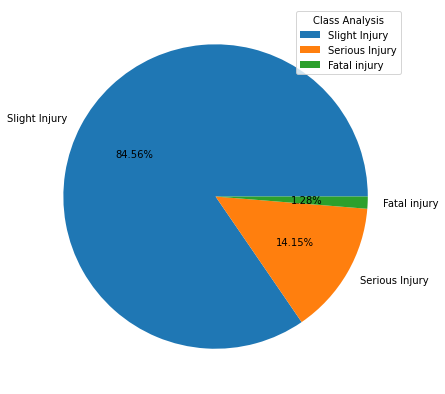

In [13]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.legend(title="Class Analysis", loc="upper right")
plt.show()

Ecoding all the values using Label Encoder.

In [14]:
LE = LabelEncoder()
df=df.apply(LE.fit_transform)  

Seperating labels and splitting the data into train and test set.

In [15]:
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
print(f"xtrain shape: {xtrain.shape}")
print(f"ytrain shape: {ytrain.shape}")
print(f"xtest shape: {xtest.shape}")
print(f"ytest shape: {ytest.shape}")

xtrain shape: (8621, 23)
ytrain shape: (8621,)
xtest shape: (3695, 23)
ytest shape: (3695,)


## Unsampling

The "umsampling" refers to the process of adjusting the class distribution of a dataset by increasing the number of instances in the classes that are underrepresented. This technique is often used when dealing with imbalanced datasets, where one class is significantly more frequent than another.

In [16]:
counter = Counter(ytrain)

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)

counter = Counter(ytrain)

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("Upsampled data shape: ", xtrain.shape, ytrain.shape)

Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 23) (21972,)


Removing labels from dataset after the unsampling.

In [17]:
x=df.drop(columns=["Accident_severity"])
y=df["Accident_severity"]

Scaling the data.

In [18]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

## Creating Model

We are implementing a Multilayer Perceptron Model for multilabel classification.
This model takes the inputs and have the 2 hidden layers and at the output layer it has 3 nodes which gives the score against each class.

In [19]:
def baseline_model():
  # create model
  model = Sequential()
  
  # Rectified Linear Unit Activation Function
  model.add(Dense(16, input_dim=23, activation='relu'))
  model.add(Dense(16, activation = 'relu'))
  # Softmax for multi-class classification
  model.add(Dense(3, activation='softmax'))
    
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [20]:
cmodel = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=100, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)

## Model Training

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

%time result = cross_val_score(cmodel, x, y, cv=kfold)
print("Result: %.2f%% (%.2f%%)" % (result.mean()*100, result.std()*100))

Wall time: 2min 31s
Result: 84.35% (1.06%)


Converting to expected dimentions.

In [22]:
ytrain_encoded = to_categorical(ytrain)

print(f"The ytrain encoded shape: {ytrain_encoded.shape}")
print(f"ytrain encoded: \n{ytrain_encoded}")

The ytrain encoded shape: (9852, 3)
ytrain encoded: 
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [32]:
model = baseline_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
%time history = model.fit(xtrain, ytrain_encoded, validation_split=0.33, epochs=150, batch_size=100, verbose=0)

Wall time: 13.9 s


## Visualization of accuracy and loss graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


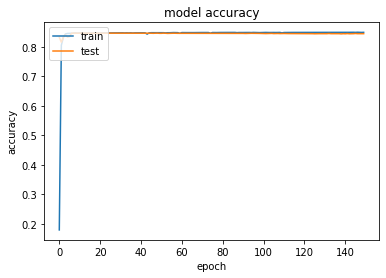

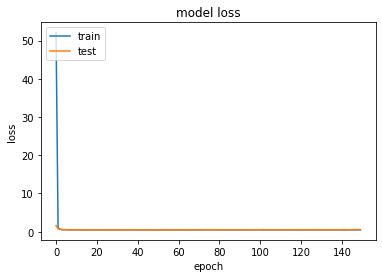

In [33]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model Evaluation

In [34]:
ytest_encoded = to_categorical(ytest)
_, accuracy = model.evaluate(xtest, ytest_encoded)
print('Accuracy from evaluate: %.2f' % (accuracy*100)+"%")

77/77 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.8438
Accuracy from evaluate: 84.38%
